In [569]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [570]:
nflTeamData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pbp-2023.csv')

In [584]:
#get lions data offense or defence
lionsData = nflTeamData.loc[(nflTeamData['OffenseTeam'] == 'DET') | (nflTeamData['DefenseTeam'] == 'DET')]
lionsData.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')

'GameId',
'GameDate',
'Quarter',
'Minute',
'Second',
OffenseTeam',
'DefenseTeam',
'Down',
'ToGo',
'YardLine',
'Unnamed: 10',
'SeriesFirstDown',
'Unnamed: 12',
'NextScore',
'Description',
'TeamWin',
'SeasonYear',
'Yards',
'Formation',
'PlayType',
'IsRush',
'IsPass',
'IsIncomplete',
'IsTouchdown',
'PassType',
'IsSack',
'IsChallenge',
'IsChallengeReversed',
'Challenger',
'IsMeasurement',
'IsInterception',
'IsFumble',
'IsPenalty',
'IsTwoPointConversion',
'IsTwoPointConversionSuccessful',
'RushDirection',
'YardLineFixed',
'YardLineDirection',
'IsPenaltyAccepted',
'PenaltyTeam',
'IsNoPlay',
'PenaltyType',
'PenaltyYards'

In [572]:
lionsData['DetScore']=0
lionsData['OpponentScore']=0
for index, row in lionsData.iterrows():
  if(row['IsTouchdown'] == True and row['IsInterception'] == False):
    if(row['IsPenalty'] == False and "NO PLAY" not in str.upper(row['Description'])):
      lionsData.loc[index,'PointsScored'] = str(row['OffenseTeam']) + str("= 6")
      if(str(row['OffenseTeam'])=='DET'):
        lionsData.loc[index,'DetScore'] = 6
      else:
        lionsData.loc[index,'OpponentScore'] = 6
  elif(row['IsTouchdown'] == True and row['IsInterception'] == True):
    if(str(row['DefenseTeam'])=='DET'):
      lionsData.loc[index,'DetScore'] = 6
    else:
      lionsData.loc[index,'OpponentScore'] = 6
  elif(row['IsTwoPointConversion'] == True and row['IsTwoPointConversionSuccessful'] == True):
    lionsData.loc[index,'PointsScored'] = str(row['OffenseTeam']) + str("= 2")
    if(str(row['OffenseTeam'])=='DET'):
      lionsData.loc[index,'DetScore'] = 2
    else:
      lionsData.loc[index,'OpponentScore'] = 2
  elif("FIELD GOAL IS GOOD" in str.upper(row['Description'])):
    lionsData.loc[index,'PointsScored'] = str(row['OffenseTeam']) + str("= 3")
    if(str(row['OffenseTeam'])=='DET'):
      lionsData.loc[index,'DetScore'] = 3
    else:
      lionsData.loc[index,'OpponentScore'] = 3
  elif("EXTRA POINT IS GOOD" in str.upper(row['Description'])):
    lionsData.loc[index,'PointsScored'] = str(row['OffenseTeam']) + str("= 1")
    if(str(row['OffenseTeam'])=='DET'):
      lionsData.loc[index,'DetScore'] = 1
    else:
      lionsData.loc[index,'OpponentScore'] = 1
  elif("SAFETY." in str.upper(row['Description'])):
    lionsData.loc[index,'PointsScored'] = str(row['DefenseTeam']) + str("= 2")
    if(str(row['DefenseTeam'])=='DET'):
      lionsData.loc[index,'OpponentScore'] = 2
    else:
      lionsData.loc[index,'DefenseTeam'] = 2
  else:
    lionsData.loc[index,'PointsScored'] = ""



<ipython-input-572-2aac808b33ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lionsData['DetScore']=0
<ipython-input-572-2aac808b33ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lionsData['OpponentScore']=0
<ipython-input-572-2aac808b33ba>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [573]:
lionsDataYards =pd.DataFrame(lionsData[['GameId','OffenseTeam','Yards','DetScore','OpponentScore']].groupby(['GameId','OffenseTeam']).sum('Yards').reset_index())
lionsDataYards['isDetroit']="OPP"
for index, row in lionsDataYards.iterrows():
  if(row['OffenseTeam'] == 'DET'):
    lionsDataYards.loc[index,'isDetroit'] = "DET"
#get the final YARDS information
lionsDataFinalScore = lionsDataYards
lionsDataYards.sort_values(['isDetroit','GameId'],ascending=[True,True],inplace=True) #Sort isn't in place by default! hence inplace=True
lionsDataYards.reset_index(inplace = True)


#get the final SCORE information
lionsDataFinalScore.sort_values(['GameId','isDetroit'],ascending=[True,True],inplace=True) #Sort isn't in place by default! hence inplace=True
lionsDataFinalScore.reset_index(inplace = True)


In [574]:
from numpy import nan
lionsDataYards =pd.DataFrame(lionsData[['GameId','OffenseTeam','Yards','DetScore','OpponentScore']].groupby(['GameId','OffenseTeam']).sum('Yards').reset_index())
lionsDataYards['isDetroit']="OPP"
for index, row in lionsDataYards.iterrows():
  if(row['OffenseTeam'] == 'DET'):
    lionsDataYards.loc[index,'isDetroit'] = "DET"
#get the final YARDS information
lionsDataFinalScore = lionsDataYards
lionsDataYards.sort_values(['isDetroit','GameId'],ascending=[True,True],inplace=True) #Sort isn't in place by default! hence inplace=True
lionsDataYards.reset_index(inplace = True)
lionsDataYards
#get the final SCORE information
lionsDataFinalScore.sort_values(['GameId','isDetroit'],ascending=[True,True],inplace=True) #Sort isn't in place by default! hence inplace=True
lionsDataFinalScore.reset_index(inplace = True)


for index, row in lionsDataYards.iterrows():
  if(index % 2): #OPP
    lionsDataYards.loc[index,'DetScore'] =lionsDataYards.loc[index,'DetScore'] +lionsDataYards.loc[index-1,'DetScore']
    lionsDataYards.loc[index,'OpponentScore'] =lionsDataYards.loc[index,'OpponentScore'] +lionsDataYards.loc[index-1,'OpponentScore']
    if(lionsDataYards.loc[index,'DetScore'] < lionsDataYards.loc[index,'OpponentScore']):
      lionsDataYards.loc[index,'WinsLosses'] = "LOSS"
    else:
      lionsDataYards.loc[index,'WinsLosses'] = "WIN"
    if(index !=0):
      lionsDataYards.loc[index-1,'DetScore'] = lionsDataYards.loc[index,'DetScore']
      lionsDataYards.loc[index-1,'OpponentScore'] = lionsDataYards.loc[index,'OpponentScore']

for index, row in lionsDataYards.iterrows():
  if(index % 2): #OPP
    gameFinalString = "{} {} {} {} {}{}".format(lionsDataYards.loc[index,'OffenseTeam'], lionsDataYards.loc[index,'OpponentScore'],"vs. DET", lionsDataYards.loc[index,'DetScore'],'\n',lionsDataYards.loc[index,'WinsLosses'])
    lionsDataYards.loc[index,'Games'] =gameFinalString

#sort wins losses
lionsDataYards.sort_values(['WinsLosses','GameId','isDetroit'],ascending=[True,True,True],inplace=True) #Sort isn't in place by default! hence inplace=True
#remove null values for the use of the game info
gamesDF = lionsDataYards.dropna(subset=['Games'])


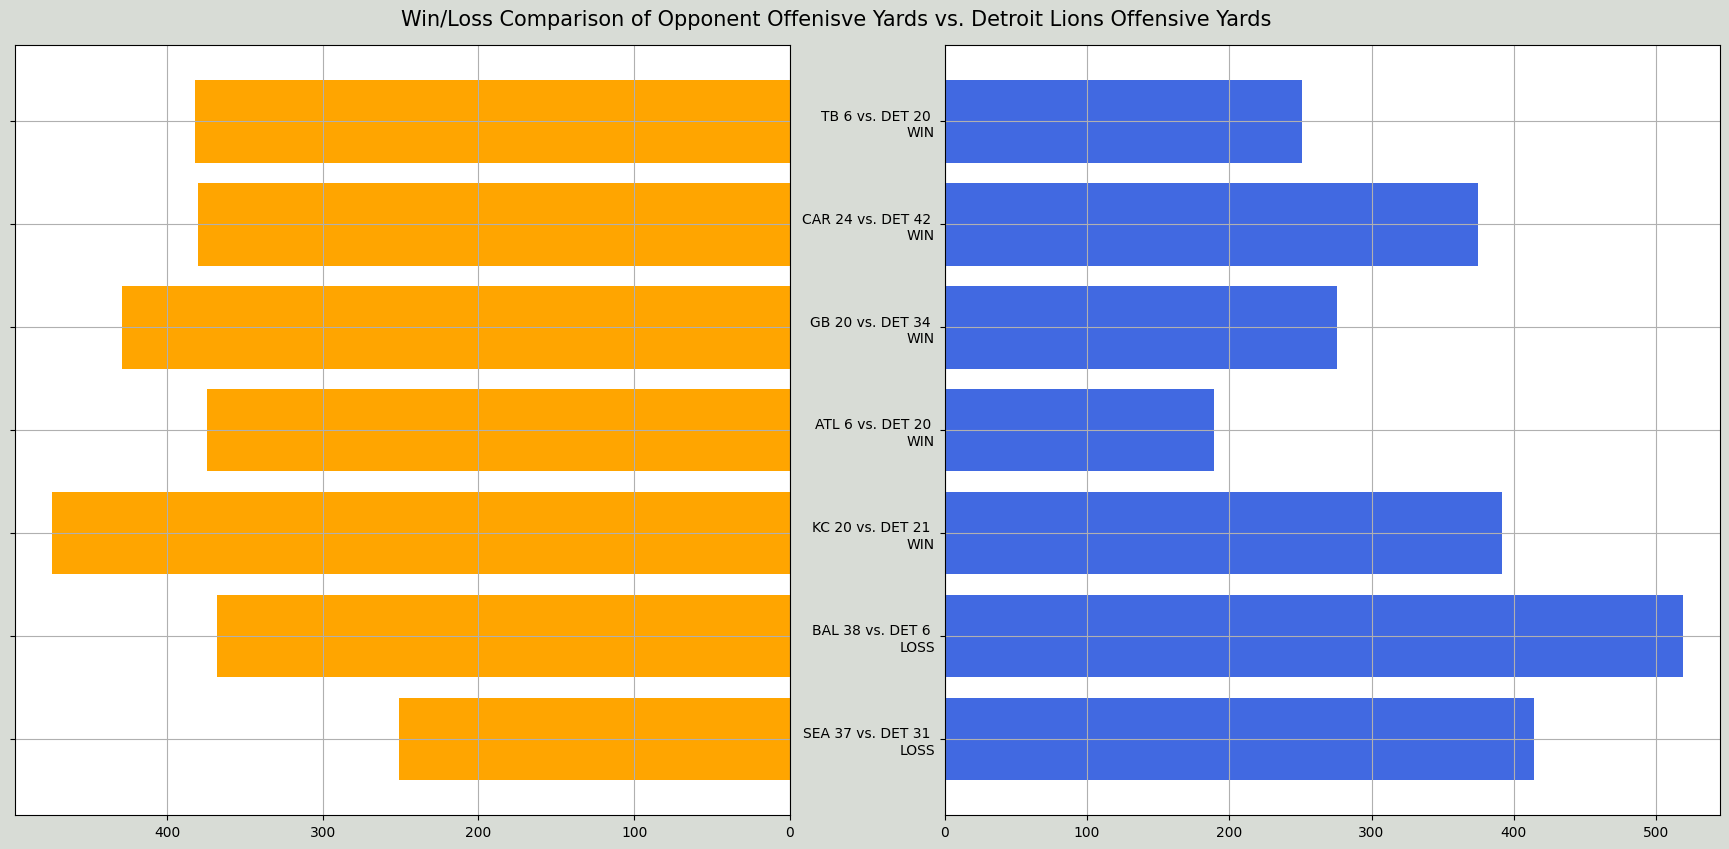

In [581]:

y = range(0, len(gamesDF))
x_det = lionsDataYards.iloc[0:int(len(lionsDataYards)/2), lionsDataYards.columns.get_loc('Yards')]
x_opp = lionsDataYards.iloc[int(len(lionsDataYards)/2-1):int(len(lionsDataYards)-1), lionsDataYards.columns.get_loc('Yards')]

#x_opp = df['OPP']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=False, figsize=(22, 10))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Win/Loss Comparison of Opponent Offenisve Yards vs. Detroit Lions Offensive Yards ", fontsize=15, ha='center')

#define det and opponent bars
axes[1].barh(y, x_det, align='center', color='royalblue')
axes[0].barh(y, x_opp, align='center', color='orange')
#adjust grid parameters and specify labels for y-axis

axes[1].grid()
axes[0].set(yticks=y, yticklabels="")
axes[1].set(yticks=y, yticklabels=gamesDF['Games'])
axes[0].invert_xaxis()
axes[0].grid()

plt.show()



